# Import Package

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Import Data

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/dataset.csv")
df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius
0,2018-12-31,Kepulauan Seribu,Siang,Hujan Lokal,70 - 90,24 - 32
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan Lokal,70 - 90,24 - 32
2,2018-12-31,Kepulauan Seribu,Malam,Hujan Lokal,70 - 90,24 - 32
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan Ringan,70 - 90,24 - 32
4,2018-12-31,Jakarta Utara,Siang,Hujan Lokal,70 - 90,24 - 32


mengambil dataset prakiraan cuaca Provinsi DKI Jakarta tahun 2018 dari website https://katalog.data.go.id/dataset/data-prakiraan-cuaca-wilayah-provinsi-dki-jakarta-tahun-2018

# Preprocessing (1)

### Melihat Jumlah Baris dan Kolom

In [5]:
df.shape

(8535, 6)

dataset terdiri dari 8535 baris dan 6 kolom

### Melihat Missing Value

In [6]:
df.isnull().sum()

tanggal                 135
wilayah                 135
waktu                   135
cuaca                   135
kelembaban_persen       135
suhu_derajat_celcius    135
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

tanggal                 0
wilayah                 0
waktu                   0
cuaca                   0
kelembaban_persen       0
suhu_derajat_celcius    0
dtype: int64

membuang data yang kosong atau null

#### Melihat Kembali Jumlah Baris dan Kolom

In [8]:
df.shape

(8400, 6)

jumlah baris menjadi 8400 dan kolom tetap 6

### Menggunakan Regex untuk mengelompokkan jenis Cuaca

In [9]:
df["cuaca"].unique()

array(['Hujan Lokal', 'Hujan Ringan', 'Berawan', 'Cerah Berawan', 'Cerah',
       'Berawan Tebal', 'Hujan Sedang', 'Cerah Berawn', 'Cerang Berawan',
       'Beawan', 'Berawan ', 'Hujan Petir', 'Hujan Lokal ',
       'Cerah Berawan ', 'Cerah ', 'Cerah Berawah', 'Cerah  ', ' Berawan',
       'Hujan', 'Hujan Petir ', 'Hujan Sedang ', 'Cerah berawan',
       'Hujan Ringanl', 'Berawa', 'Hujang Sedang', 'Hujan Loka',
       'Hujan Ringan '], dtype=object)

terdapat 27 jenis cuaca sehingga akan dikelompokkan jenis cuaca menjadi 3 yaitu Hujan, Cerah dan Berawan

In [10]:
import re

def cuaca(x):
  if (re.findall("Cerah", x)):
    return 'Cerah'
  elif (re.findall("Hujan", x)):
    return 'Hujan'
  elif (re.findall("Berawan", x)):
    return 'Berawan'
  else:
    return 'Tidak Teridentifikasi'

df["cuaca"] = df['cuaca'].apply(cuaca)
df["cuaca"].value_counts()

Cerah                    3796
Berawan                  2896
Hujan                    1706
Tidak Teridentifikasi       2
Name: cuaca, dtype: int64

3796 data cuaca cerah<br>
2896 data cuaca berawan<br>
1706 data cuaca hujan<br>
dan 2 data cuaca yang tidak teridentifikasi karena tidak termasuk jenis cuaca Hujan, Cerah maupun Berawan

#### Membuang Data yang tidak sesuai atau tidak berhubungan

In [11]:
df.drop(df[df["cuaca"] == "Tidak Teridentifikasi"].index, inplace=True)
df["cuaca"].unique()

array(['Hujan', 'Berawan', 'Cerah'], dtype=object)

### Menggunakan Regex untuk mengelompokkan jenis Waktu

In [12]:
df.waktu.value_counts()

Siang        1758
Pagi         1758
Dini Hari    1758
Malam        1757
siang         342
pagi          342
malam         342
dini hari     341
Name: waktu, dtype: int64

terdapat 8 jenis waktu pengambilan data cuaca sehingga akan dikelompokkan menjadi 4 waktu saja yaitu Siang, Pagi, Malam, dan Dini Hari

In [13]:
import re

def cuaca(x):
  if (re.findall("dini hari", x)):
    return 'Dini Hari'
  elif (re.findall("siang", x)):
    return 'Siang'
  elif (re.findall("pagi", x)):
    return 'Pagi'
  elif (re.findall("malam", x)):
    return 'Malam'
  else:
    return x

df["waktu"] = df['waktu'].apply(cuaca)
df["waktu"].value_counts()

Siang        2100
Pagi         2100
Malam        2099
Dini Hari    2099
Name: waktu, dtype: int64

Waktu Siang terdapat 2100 data<br>
Waktu Pagi terdapat 2100 data<br>
Waktu Malam terdapat 2100 data<br>
Waktu Dini Hari terdapat 2100 data<br>

membuang data cuaca yang tidak teridentifikasi sehingga tersisa 3 jenis cuaca yaitu Hujan, Berawan, dan Cerah

### Split Data Kelembaban menjadi Kelembaban Minimal dan Maximal

In [14]:
df["kelembaban_min"] = df['kelembaban_persen'].apply(lambda x: x.split("-")[0])
df["kelembaban_min"] = [x.strip(' ') for x in df["kelembaban_min"]]

df["kelembaban_max"] = df['kelembaban_persen'].apply(lambda x: x.split("-")[1])
df["kelembaban_max"] = [x.strip(' ') for x in df["kelembaban_max"]]

df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembaban_min,kelembaban_max
0,2018-12-31,Kepulauan Seribu,Siang,Hujan,70 - 90,24 - 32,70,90
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan,70 - 90,24 - 32,70,90
2,2018-12-31,Kepulauan Seribu,Malam,Hujan,70 - 90,24 - 32,70,90
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan,70 - 90,24 - 32,70,90
4,2018-12-31,Jakarta Utara,Siang,Hujan,70 - 90,24 - 32,70,90


membuat kolom kelembaban_min dengan mengambil nilai terkecil dari kolom kelembaban_persen<br>
membuat kolom kelembaban_max dengan mengambil nilai terbesar dari kolom kelembaban_persen<br>
<br>
dengan split data pada kolom kelembaban_persen agar terbagi menjadi 2 bagian untuk bagian kiri untuk nilai minimal dan bagian kanan untuk nilai maksimal

#### Melihat Masing Masing Data dari Kelembapan Minimal dan Maksimal

In [15]:
print('Kelembaban Min\n', df['kelembaban_min'].value_counts(), '\n\n')
print('Kelembaban Min\n', df['kelembaban_max'].value_counts(), '\n')

Kelembaban Min
 70    1727
55    1296
65    1272
60    1224
75     839
45     624
50     600
80     480
40     192
35      96
85      48
Name: kelembaban_min, dtype: int64 


Kelembaban Min
 95     3264
90     2375
85     1128
100    1031
80      504
75       96
Name: kelembaban_max, dtype: int64 



### Split Data Suhu menjadi Suhu Minimal dan Maximal

In [16]:
df["suhu_min"] = df.suhu_derajat_celcius.apply(lambda x: x.split("-")[0])
df["suhu_min"] = [x.strip(' ') for x in df["suhu_min"]]

df["suhu_max"] = df.suhu_derajat_celcius.apply(lambda x: x.split("-")[1])
df["suhu_max"] = [x.strip(' ') for x in df["suhu_max"]]

df.head()

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembaban_min,kelembaban_max,suhu_min,suhu_max
0,2018-12-31,Kepulauan Seribu,Siang,Hujan,70 - 90,24 - 32,70,90,24,32
1,2018-12-31,Kepulauan Seribu,Pagi,Hujan,70 - 90,24 - 32,70,90,24,32
2,2018-12-31,Kepulauan Seribu,Malam,Hujan,70 - 90,24 - 32,70,90,24,32
3,2018-12-31,Kepulauan Seribu,Dini Hari,Hujan,70 - 90,24 - 32,70,90,24,32
4,2018-12-31,Jakarta Utara,Siang,Hujan,70 - 90,24 - 32,70,90,24,32


membuat kolom suhu_min dengan mengambil nilai terkecil dari kolom suhu_derajat_celcius<br>
membuat kolom suhu_max dengan mengambil nilai terbesar dari kolom suhu_derajat_celcius<br>
<br>
dengan split data pada kolom suhu_derajat_celcius agar terbagi menjadi 2 bagian untuk bagian kiri untuk nilai minimal dan bagian kanan untuk nilai maksimal

#### Melihat Masing Masing Data dari Suhu Minimal dan Maksimal

In [17]:
print('Suhu Min\n', df['suhu_min'].value_counts(), '\n')
print('Suhu Max\n', df['suhu_max'].value_counts(), '\n')

Suhu Min
 24    4102
23    3072
25     576
22     552
21      48
20      24
26      24
Name: suhu_min, dtype: int64 

Suhu Max
 33    3431
32    1991
34    1440
31     696
30     360
35     288
29     120
28      72
Name: suhu_max, dtype: int64 



### Mengubah Tipe Data

#### Melihat Tipe Data setiap Kolom

In [18]:
df.dtypes

tanggal                 object
wilayah                 object
waktu                   object
cuaca                   object
kelembaban_persen       object
suhu_derajat_celcius    object
kelembaban_min          object
kelembaban_max          object
suhu_min                object
suhu_max                object
dtype: object

memperbaiki jenis tipe data sesuai dengan isi dari data pada kolom tersebut

#### Mengubah Tipe data yang tidak sesuai

In [19]:
df["kelembaban_min"] = df.kelembaban_min.astype(int)
df["kelembaban_max"] = df.kelembaban_max.astype(int)
df["suhu_min"] = df.suhu_min.astype(int)
df["suhu_max"] = df.suhu_max.astype(int)
df.dtypes

tanggal                 object
wilayah                 object
waktu                   object
cuaca                   object
kelembaban_persen       object
suhu_derajat_celcius    object
kelembaban_min           int64
kelembaban_max           int64
suhu_min                 int64
suhu_max                 int64
dtype: object

mengubah kolom kelembaban_min, kelembaban_max, suhu_min, dan suhu_max menjadi integer karena data pada kolom tersebut bersifat numerikal

### Informasi Data

#### Melihat informasi mengenai kolom

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8398 entries, 0 to 8399
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   tanggal               8398 non-null   object
 1   wilayah               8398 non-null   object
 2   waktu                 8398 non-null   object
 3   cuaca                 8398 non-null   object
 4   kelembaban_persen     8398 non-null   object
 5   suhu_derajat_celcius  8398 non-null   object
 6   kelembaban_min        8398 non-null   int64 
 7   kelembaban_max        8398 non-null   int64 
 8   suhu_min              8398 non-null   int64 
 9   suhu_max              8398 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 721.7+ KB


In [21]:
df.sample(5)

,tanggal,wilayah,waktu,cuaca,kelembaban_persen,suhu_derajat_celcius,kelembaban_min,kelembaban_max,suhu_min,suhu_max
5175,2018-05-23,Jakarta Selatan,Dini Hari,Berawan,80 - 100,24 - 33,80,100,24,33
5503,2018-05-09,Jakarta Utara,Dini Hari,Cerah,65 - 90,23 - 34,65,90,23,34
3327,2018-08-12,Jakarta Selatan,Dini Hari,Cerah,60 - 90,23 - 32,60,90,23,32
8194,2018-01-09,Jakarta Timur,Malam,Berawan,75 - 95,23 - 32,75,95,23,32
2257,2018-09-26,Kepulauan Seribu,Pagi,Cerah,45 - 80,22 - 34,45,80,22,34


In [22]:
df['cuaca'].value_counts()

Cerah      3796
Berawan    2896
Hujan      1706
Name: cuaca, dtype: int64

data tidak balanced, sehingga kedepannya akan dilakukan proses oversampling menggunakan SMOTE

#### Membagi data antara kolom numerikal dengan kategorikal

In [23]:
numeric = ['kelembaban_min', 'kelembaban_max', 'suhu_min', 'suhu_max', 'kelembaban_persen', 'suhu_derajat_celcius']
categoric = ['cuaca', 'waktu', 'wilayah', 'tanggal']

#### Statistik kolom numerik

In [24]:
df[numeric].describe()

,kelembaban_min,kelembaban_max,suhu_min,suhu_max
count,8398.000000,8398.000000,8398.000000,8398.000000
mean,62.254704,91.727792,23.548464,32.608597
std,10.592668,5.562658,0.775947,1.246190
min,35.000000,75.000000,20.000000,28.000000
25%,55.000000,90.000000,23.000000,32.000000
50%,65.000000,95.000000,24.000000,33.000000
75%,70.000000,95.000000,24.000000,33.000000
max,85.000000,100.000000,26.000000,35.000000


persebaran nilai pada data kelembaban_min, kelembaban_max, suhu_min, dan suhu_max sudah bagus dan tidak perlu dilakukan feature scaling<br>
<br>
kolom kelembaban_persen dan suhu_derajat_celcius akan di drop pada tahap selanjutnya karena sudah tergantikan oleh kolom kelembaban_min, kelembaban_max, suhu_min, dan suhu_max.

persebaran data yang simetrik distribusinya dilihat dari nilai mean dan median yang tidak berbeda jauh

#### Statistik kolom kategorik

In [25]:
df[categoric].describe()

,cuaca,waktu,wilayah,tanggal
count,8398,8398,8398,8398
unique,3,4,6,348
top,Cerah,Siang,Jakarta Utara,2018-01-02
freq,3796,2100,1400,48


kolom cuaca, waktu, dan wilayah masih bersifat object / string maka selanjutnya akan dilakukan encode pada data kolom tersebut<br>
<br>
kolom tanggal akan di drop pada tahap selanjutnya karena tidak diperlukan pada proses menganalisis serta memproses data

#### Melihat duplikasi data

In [26]:
df.duplicated().sum()

0

tidak terdapat data yg duplikat

### Membuang Kolom yang tidak diperlukan

In [27]:
df.drop(columns=["kelembaban_persen", "suhu_derajat_celcius", "tanggal"], inplace=True)

membuang kolom yang tidak diperlukan seperti kelembaban_persen karena sudah digantikan oleh kolom kelembaban_min dan kelembaban_max<br><br>
membuang kolom suhu_derajat_celcius karena sudah digantikan oleh suhu_min dan suhu_max<br><br>
membuang kolom tanggal karena tidak diperlukan dalam proses menganalisis dan memproses data cuaca Provinsi DKI Jakarta tahun 2018

### Encoding (1)

#### Mengubah Kolom cuaca menggunakan label encoding

In [28]:
mapping_cuaca = {
    'Cerah': 0,
    'Hujan': 1,
    'Berawan': 2
}

df['cuaca'] = df['cuaca'].map(mapping_cuaca)
df.head()

,wilayah,waktu,cuaca,kelembaban_min,kelembaban_max,suhu_min,suhu_max
0,Kepulauan Seribu,Siang,1,70,90,24,32
1,Kepulauan Seribu,Pagi,1,70,90,24,32
2,Kepulauan Seribu,Malam,1,70,90,24,32
3,Kepulauan Seribu,Dini Hari,1,70,90,24,32
4,Jakarta Utara,Siang,1,70,90,24,32


Mengubah Feature Categorical menjadi numercial,<br>
Mengubah Cuaca menjadi 0<br>
Mengubah Hujan menjadi 1<br>
Mengubah Berawan menjadi 2

# Visualisasi Data

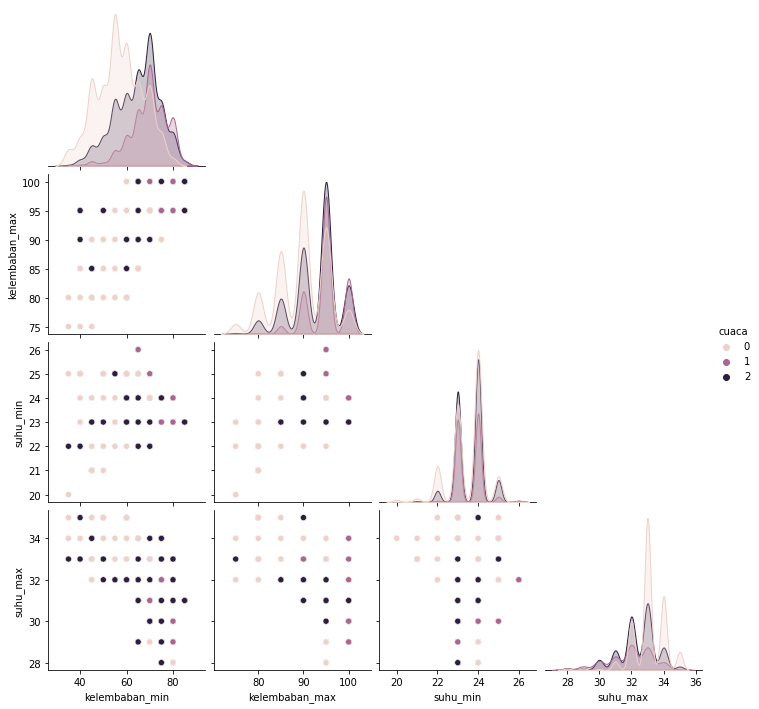

In [29]:
sns.pairplot(df, hue="cuaca", corner=True)

persebaran data cuaca Provinsi DKI Jakarta pada Tahun 2018

# Splitting Data

In [30]:
X = df.drop(columns=["cuaca"])
y = df["cuaca"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6718, 6), (1680, 6), (6718,), (1680,))

membagi data berdasarkan data latih dan data uji dengan perbandingan data uji sebesar 20% dan data latih sebesar 80% dari total data dengan pembagian secara stratify<br>
<br>
membagi data menjadi fitur dan target, dimana variable y merupakan target yaitu kolom cuaca sedangkan variable x merupakan sisa kolom selain kolom cuaca<br>
<br>
total data latih 6718 data<br>
total data uji 1688 data

# Preprocessing (2)

#### Melihat isi data latih

In [31]:
X_train.sample(5)

,wilayah,waktu,kelembaban_min,kelembaban_max,suhu_min,suhu_max
2305,Kepulauan Seribu,Pagi,40,85,23,34
4465,Kepulauan Seribu,Pagi,75,95,23,32
7684,Jakarta Utara,Siang,75,95,23,30
3981,Jakarta Barat,Pagi,55,90,22,33
5307,Kepulauan Seribu,Dini Hari,65,95,24,33


### Column Transform

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric = ["kelembaban_min", "kelembaban_max", "suhu_min", "suhu_max"]
categoric = ['waktu', 'wilayah']

preprocessor = ColumnTransformer([
    ('numeric', PolynomialFeatures(), numeric),
    ('categoric', OneHotEncoder(handle_unknown='ignore'), categoric),
])

# Proses Fitting Data (1)

## XGB Classifier

### Fitting

#### parameter yang akan di Tuning

In [33]:
from jcopml.tuning.space import Integer, Real

parameters = {
    'algo__max_depth': Integer(low=1, high=10),
    'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
    'algo__n_estimators': Integer(low=100, high=200),
    'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
    'algo__gamma': Integer(low=1, high=10),
    'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
    'algo__reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
    'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform'),
    'prep__numeric__degree': Integer(low=1, high=3),
    'prep__numeric__interaction_only': [True, False]
}

#### fitting menggunakan XGBClassifier dengan tuning menggunakan RandomizedSearchCV

In [34]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42, use_label_encoder=False))
])

model_XGB = RandomizedSearchCV(pipeline, parameters, cv=3, n_iter=500, n_jobs=-1, verbose=1, random_state=42)
model_XGB.fit(X_train, y_train)

print(model_XGB.best_params_)
print(model_XGB.score(X_train, y_train), model_XGB.best_score_, model_XGB.score(X_test, y_test))

y_pred = model_XGB.predict(X_test)
y_pred_train = model_XGB.predict(X_train)

print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_train, y_pred_train), "\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'algo__colsample_bytree': 0.9554779473275833, 'algo__gamma': 2, 'algo__learning_rate': 0.08826616660734693, 'algo__max_depth': 9, 'algo__n_estimators': 100, 'algo__reg_alpha': 0.011907916572798662, 'algo__reg_lambda': 0.042450971980599515, 'algo__subsample': 0.7457400078117535, 'prep__numeric__degree': 2, 'prep__numeric__interaction_only': True}
0.7649598094671033 0.6893441348178396 0.6922619047619047
[[598  36 126]
 [ 53 186 102]
 [141  59 379]] 

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      3036
           1       0.78      0.71      0.74      1365
           2       0.71      0.70      0.70      2317

    accuracy                           0.76      6718
   macro avg       0.76      0.75      0.75      6718
weighted avg       0.76      0.76      0.76      6718
 

              precision    recall  f1-score   support

           0       0.76      0.79      0.77 

### Fitting dengan Oversampling

#### Parameter yang akan dituning dengan pipeline

In [35]:
from jcopml.tuning.space import Integer, Real

parameter_smote = {
    'algo__max_depth': Integer(low=1, high=10),
    'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
    'algo__n_estimators': Integer(low=100, high=200),
    'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
    'algo__gamma': Integer(low=1, high=10),
    'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
    'algo__reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
    'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform'),
    'prep__numeric__degree': Integer(low=1, high=3),
    'prep__numeric__interaction_only': [True, False],
    'smote__k_neighbors': [3, 5, 7],
    'smote__sampling_strategy': ['minority', 'majority', 'not minority', 'not majority'],
}

#### Fitting menggunakan XGBClassifier dan Oversampling SMOTE dengan tuning menggunakan RandomizedSearchCV

In [36]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipeline = Pipeline([
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42, n_jobs=-1)), 
    ('algo', XGBClassifier(n_jobs=-1, random_state=42, use_label_encoder=False)),
])

model_XGB_SMOTE = RandomizedSearchCV(pipeline, parameter_smote, cv=3, n_iter=500, n_jobs=-1, verbose=1, random_state=42)
model_XGB_SMOTE.fit(X_train, y_train)

print(model_XGB_SMOTE.best_params_)
print(model_XGB_SMOTE.score(X_train, y_train), model_XGB_SMOTE.best_score_, model_XGB_SMOTE.score(X_test, y_test))

y_pred = model_XGB_SMOTE.predict(X_test)
y_pred_train = model_XGB_SMOTE.predict(X_train)

print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_train, y_pred_train), "\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
315 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
315 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 226, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory

{'algo__colsample_bytree': 0.5274558687373735, 'algo__gamma': 2, 'algo__learning_rate': 0.034444852940512076, 'algo__max_depth': 10, 'algo__n_estimators': 131, 'algo__reg_alpha': 0.00467696754681168, 'algo__reg_lambda': 0.0038824176637197463, 'algo__subsample': 0.7865383989561492, 'prep__numeric__degree': 2, 'prep__numeric__interaction_only': True, 'smote__k_neighbors': 7, 'smote__sampling_strategy': 'not majority'}
0.7579636796665674 0.6848782540037006 0.6904761904761905
[[583  46 131]
 [ 45 206  90]
 [137  71 371]] 

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      3036
           1       0.72      0.75      0.74      1365
           2       0.71      0.69      0.70      2317

    accuracy                           0.76      6718
   macro avg       0.75      0.75      0.75      6718
weighted avg       0.76      0.76      0.76      6718
 

              precision    recall  f1-score   support

           0       0.76      0.77    

### Fitting menggunakan teknik PCA Reduksi Dimensi

#### Membuat pipeline

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

numeric = ["kelembaban_min", "kelembaban_max", "suhu_min", "suhu_max"]
categoric = ['waktu', 'wilayah']

preprocessor_PCA = ColumnTransformer([
    ('numeric', PolynomialFeatures(interaction_only=True), numeric),
    ('categoric', OneHotEncoder(handle_unknown='ignore'), categoric),
])

#### Parameter yang akan di Tuning

In [38]:
from jcopml.tuning.space import Integer, Real

parameters = {
    'algo__max_depth': Integer(low=1, high=10),
    'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
    'algo__n_estimators': Integer(low=100, high=200),
    'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
    'algo__gamma': Integer(low=1, high=10),
    'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
    'algo__reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
    'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform'),
    'pca__n_components': Integer(low=1, high=21),
    'prep__numeric__degree': Integer(low=1, high=3),
    'prep__numeric__interaction_only': [True, False]
}

#### Fitting menggunakan XGBClassifier menggunakan teknik PCA dengan tuning menggunakan RandomSearchCV

In [39]:
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('prep', preprocessor_PCA),
    ('pca', PCA()),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42, use_label_encoder=False))
])

model_XGB_PCA = RandomizedSearchCV(pipeline, parameters, cv=3, n_iter=500, n_jobs=-1, verbose=1, random_state=42)
model_XGB_PCA.fit(X_train, y_train)

print(model_XGB_PCA.best_params_)
print(model_XGB_PCA.score(X_train, y_train), model_XGB_PCA.best_score_, model_XGB_PCA.score(X_test, y_test))

y_pred = model_XGB_PCA.predict(X_test)
y_pred_train = model_XGB_PCA.predict(X_train)

print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_train, y_pred_train), "\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
156 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", l

{'algo__colsample_bytree': 0.897955434055594, 'algo__gamma': 2, 'algo__learning_rate': 0.015415722348909035, 'algo__max_depth': 7, 'algo__n_estimators': 162, 'algo__reg_alpha': 0.0013924162890248672, 'algo__reg_lambda': 0.07284371265166893, 'algo__subsample': 0.5713223173537884, 'pca__n_components': 17, 'prep__numeric__degree': 2, 'prep__numeric__interaction_only': False}
0.7588568026198274 0.6766910052319276 0.6767857142857143
[[605  38 117]
 [ 60 178 103]
 [170  55 354]] 

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      3036
           1       0.78      0.67      0.72      1365
           2       0.71      0.68      0.69      2317

    accuracy                           0.76      6718
   macro avg       0.76      0.74      0.75      6718
weighted avg       0.76      0.76      0.76      6718
 

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       760
           1       0.66     

## Random Forest

### Fitting

#### Parameter yang akan di Tuning

In [40]:
from jcopml.tuning.space import Integer, Real

parameters = {
    'algo__n_estimators': Integer(low=100, high=200),
    'algo__max_depth': Integer(low=20, high=80),
    'algo__max_features': Real(low=0.1, high=1, prior='uniform'),
    'algo__min_samples_leaf': Integer(low=1, high=20),
    'prep__numeric__degree': [1, 2, 3],
    'prep__numeric__interaction_only': [True, False]
}

#### Fitting menggunakan RandomForestClassifier dengan tuning menggunakan RandomSearchCV

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

model_RF = RandomizedSearchCV(pipeline, parameters, cv=3, n_iter=500, n_jobs=-1, verbose=1, random_state=42)
model_RF.fit(X_train, y_train)

print(model_RF.best_params_)
print(model_RF.score(X_train, y_train), model_RF.best_score_, model_RF.score(X_test, y_test))

y_pred = model_RF.predict(X_test)
y_pred_train = model_RF.predict(X_train)

print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_train, y_pred_train), "\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'algo__max_depth': 39, 'algo__max_features': 0.45783495816651487, 'algo__min_samples_leaf': 5, 'algo__n_estimators': 102, 'prep__numeric__degree': 3, 'prep__numeric__interaction_only': True}
0.7728490622208991 0.6899399046130288 0.6803571428571429
[[589  39 132]
 [ 62 177 102]
 [145  57 377]] 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      3036
           1       0.78      0.70      0.74      1365
           2       0.72      0.72      0.72      2317

    accuracy                           0.77      6718
   macro avg       0.77      0.75      0.76      6718
weighted avg       0.77      0.77      0.77      6718
 

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       760
           1       0.65      0.52      0.58       341
           2       0.62      0.65      0.63       579

    accuracy                          

### Fitting dengan Oversampling

#### Parameter yang akan dituning dengan pipeline

In [42]:
from jcopml.tuning.space import Integer, Real

parameter_smote = {
    'algo__n_estimators': Integer(low=100, high=200),
    'algo__max_depth': Integer(low=20, high=80),
    'algo__max_features': Real(low=0.1, high=1, prior='uniform'),
    'algo__min_samples_leaf': Integer(low=1, high=20),
    'prep__numeric__degree': [1, 2, 3],
    'prep__numeric__interaction_only': [True, False],
    'smote__k_neighbors': [3, 5, 7],
    'smote__sampling_strategy': ['minority', 'majority', 'not minority', 'not majority'],
}

#### Fitting menggunakan RandomForestClassifier dan Oversampling SMOTE dengan tuning menggunakan RandomSearchCV

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipeline = Pipeline([
    ('prep', preprocessor),
    ('smote', SMOTE(random_state=42, n_jobs=-1)), 
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42)),
])

model_RF_SMOTE = RandomizedSearchCV(pipeline, parameter_smote, cv=3, n_iter=500, n_jobs=-1, verbose=1, random_state=42)
model_RF_SMOTE.fit(X_train, y_train)

print(model_RF_SMOTE.best_params_)
print(model_RF_SMOTE.score(X_train, y_train), model_RF_SMOTE.best_score_, model_RF_SMOTE.score(X_test, y_test))

y_pred = model_RF_SMOTE.predict(X_test)
y_pred_train = model_RF_SMOTE.predict(X_train)

print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_train, y_pred_train), "\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
330 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
330 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 262, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py", line 226, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory

{'algo__max_depth': 65, 'algo__max_features': 0.33840590251306013, 'algo__min_samples_leaf': 5, 'algo__n_estimators': 196, 'prep__numeric__degree': 3, 'prep__numeric__interaction_only': True, 'smote__k_neighbors': 3, 'smote__sampling_strategy': 'not minority'}
0.7722536469187258 0.6854741567238776 0.6726190476190477
[[557  39 164]
 [ 47 171 123]
 [123  54 402]] 

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      3036
           1       0.79      0.67      0.73      1365
           2       0.69      0.77      0.73      2317

    accuracy                           0.77      6718
   macro avg       0.77      0.75      0.76      6718
weighted avg       0.78      0.77      0.77      6718
 

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       760
           1       0.65      0.50      0.57       341
           2       0.58      0.69      0.63       579

    accuracy                     

# Kesimpulan

berdasarkan algoritma Random Forest dengan XGBoost didapatkan bahwa: <br>
Akurasi yang didapatkan algoritma XGBoost lebih tinggi daripada Random Forest yaitu 69% sedangkan Random Forest 68% <br>

RF Smote , Akurasi Testing 67% Training 77% <br>
RF       , Akurasi Testing 68% Training 77% <br>
XGB Pca  , Akurasi Testing 68% Training 76% <br>
XGB Smote, Akurasi Testing 69% Training 76% <br>
XGB      , Akurasi Testing 69% Training 76% <br>

<br>
Proses Reduksi Dimensi tidak begitu mnemengaruhi nilai akurasi karena berdasarkan proses tersebut akurasi yang didapat tidak lebih baik dari sebelumnya.
<br>
<br>
Proses SMOTE membuat data menjadi lebih seimbang dan tidak terlalu overfitting, tetapi tidak begitu memengaruhi nilai akurasi dari model XGB dan RF.

# Predict

In [59]:
df.head(10)

,wilayah,waktu,cuaca,kelembaban_min,kelembaban_max,suhu_min,suhu_max
0,Kepulauan Seribu,Siang,1,70,90,24,32
1,Kepulauan Seribu,Pagi,1,70,90,24,32
2,Kepulauan Seribu,Malam,1,70,90,24,32
3,Kepulauan Seribu,Dini Hari,1,70,90,24,32
4,Jakarta Utara,Siang,1,70,90,24,32
5,Jakarta Utara,Pagi,2,70,90,24,32
6,Jakarta Utara,Malam,2,70,90,24,32
7,Jakarta Utara,Dini Hari,1,70,90,24,32
8,Jakarta Timur,Siang,1,70,90,24,32
9,Jakarta Timur,Pagi,2,70,90,24,32


In [66]:
pred_cuaca_1 = {
    'wilayah': ['Kepulauan Seribu', 'Kepulauan Seribu', 'Kepulauan Seribu', 'Kepulauan Seribu'],
    'waktu': ['Siang', 'Pagi', 'Malam', 'Dini Hari'],
    'kelembaban_min': [70, 70, 70, 70],
    'kelembaban_max': [90, 90, 90, 90],
    'suhu_min': [24, 24, 24, 24],
    'suhu_max': [32, 32, 32, 32],
}

pred_cuaca_2 = {
    'wilayah': ['Jakarta Utara', 'Jakarta Utara'],
    'waktu': ['Siang', 'Dini Hari'],
    'kelembaban_min': [70, 70],
    'kelembaban_max': [90, 90],
    'suhu_min': [24, 24],
    'suhu_max': [32, 32],
}

pred_cuaca_3 = {
    'wilayah': ['Jakarta Utara', 'Jakarta Utara'],
    'waktu': ['Pagi', 'Siang'],
    'kelembaban_min': [70, 70],
    'kelembaban_max': [90, 90],
    'suhu_min': [24, 24],
    'suhu_max': [32, 32],
}

In [45]:
def output_label(n):
    if n == 0:
        return "Cerah"
    elif n == 1:
        return "Hujan"
    elif n == 2:
        return "Berawan"

In [57]:
def manual_testing(cuaca):
    df_pred = pd.DataFrame(cuaca)

    pred_RF = model_RF.predict(df_pred)
    pred_RF_SMOTE = model_RF_SMOTE.predict(df_pred)
    pred_XGB_SMOTE = model_XGB_SMOTE.predict(df_pred)
    pred_XGB = model_XGB.predict(df_pred)
    pred_XGB_PCA = model_XGB_PCA.predict(df_pred)

    return print("\n\nRF Prediction: {} \nRF SMOTE Prediction: {} \nXGB Prediction: {} \nXGB SMOTE Prediction: {} \nXGB PCA Prediction: {} \n".format(output_label(pred_RF[0]), output_label(pred_RF_SMOTE[0]), output_label(pred_XGB[0]), output_label(pred_XGB_SMOTE[0]), output_label(pred_XGB_PCA[0])))
                                                                              

In [65]:
manual_testing(pred_cuaca_1)



RF Prediction: Berawan 
RF SMOTE Prediction: Berawan 
XGB Prediction: Berawan 
XGB SMOTE Prediction: Berawan 
XGB PCA Prediction: Hujan 



In [64]:
manual_testing(pred_cuaca_2)



RF Prediction: Berawan 
RF SMOTE Prediction: Berawan 
XGB Prediction: Hujan 
XGB SMOTE Prediction: Hujan 
XGB PCA Prediction: Berawan 



In [67]:
manual_testing(pred_cuaca_3)



RF Prediction: Berawan 
RF SMOTE Prediction: Berawan 
XGB Prediction: Berawan 
XGB SMOTE Prediction: Berawan 
XGB PCA Prediction: Berawan 



### Kesimpulan Prediksi

Hasil prediksi Didapatkan bahwa Algoritma XGB Lebih baik daripada RF karena dari 3 prediksi secara manual, Algoritma XGB benar 2 dan RF hanya 1